## Testing networkx to pass on to interactive API

In [73]:
import csv
import numpy as np
import glob
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
# plt-specific:
from IPython.display import display
from PIL import Image
import matplotlib.image as mpimg 

Get edges. Likely passed as parameter to function later on.

In [27]:
with open("example_output.txt", "r") as readfile:
    reader = csv.reader(readfile)
    edges = [ edge[0] for edge in reader]

# compile list of molecule names:
ligands = []
for edge in edges:
    ligA = edge.split("-")[0]
    ligB = edge.split("-")[1]  
    if not ligA in ligands:
        ligands.append(ligA)
    if not ligB in ligands:
        ligands.append(ligB)

Check out the perturbations using the preconstructed images. Need to figure out how to generate images on the fly using temp mol images.

In [22]:
def plotPertEdge(ligA, ligB):
    """Given two ligand names, plot an axis with both molecular images side by side."""
    
    # define image path.
    imgs_path = "./mol_imgs/"
    
    # read in images. Fails verbosely by default.
    imgA = mpimg.imread(imgs_path+ligA+".png")
    imgB = mpimg.imread(imgs_path+ligB+".png")
    
    # create plot with two subplots, one for each ligand.
    f, ax = plt.subplots(1, 2, figsize=(6,3))
    
    # plot images and remove axes.
    ax[0].imshow(imgA)
    ax[1].imshow(imgB)
    for axis in ax:
        axis.axis('off')
    
    plt.show()

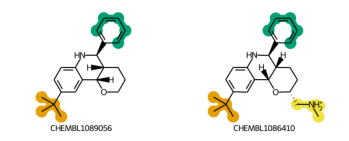

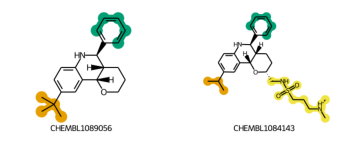

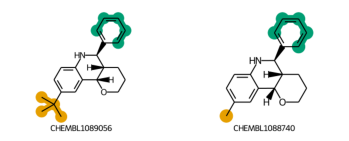

In [23]:
# plot the first three edges:
for edge in edges[:3]:
    ligA = edge.split("-")[0]
    ligB = edge.split("-")[1]
    plotPertEdge(ligA, ligB)


Construct a simple networkx graph using the example_output.txt file where nodes are labeled with ligand names (will be mol imgs later).

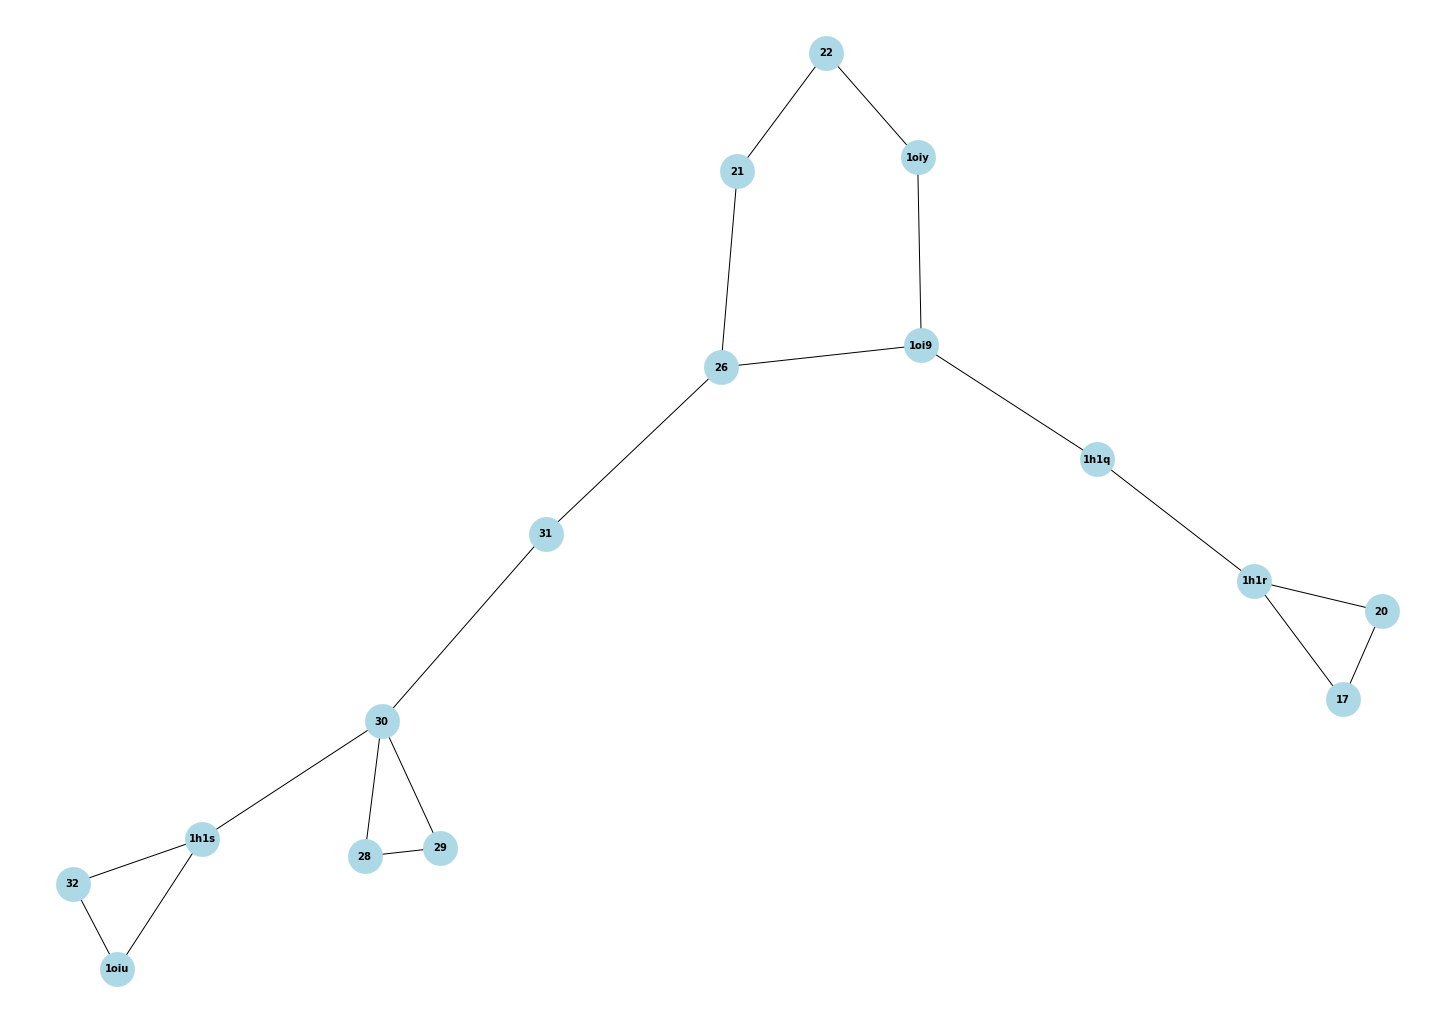

In [54]:
# take the standard networkx approach for now:
plt.figure(figsize=(20,14))
G = nx.Graph()
G.add_nodes_from(ligands)

# need to convert to iterable tuples for this nx function:
edges_tupled = [(edge.split("-")[0], edge.split("-")[1]) for edge in edges]
G.add_edges_from(edges_tupled)
nx.draw(G, node_size=1200, node_color='lightblue', linewidths=0.25, \
    font_size=10, font_weight='bold', with_labels=True)
plt.show()

Now attempt to get molecule images in each node.

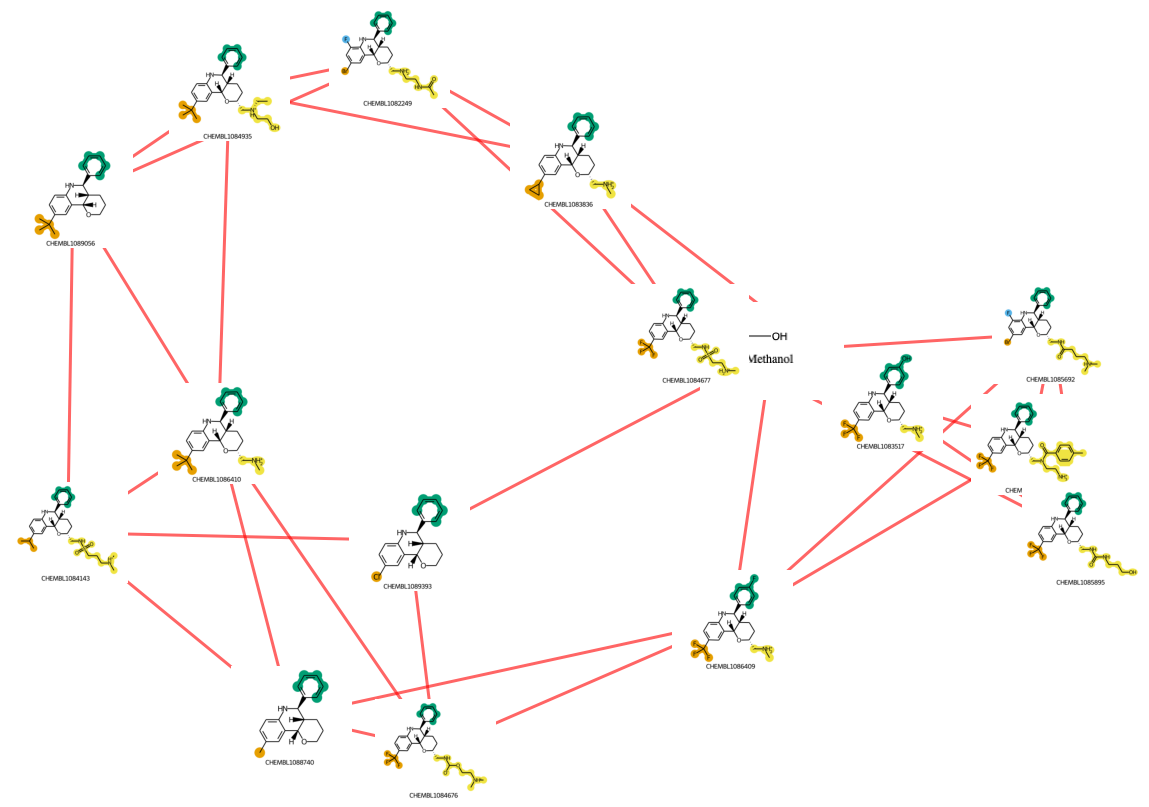

In [92]:
# take the standard networkx approach for now:
fig, ax = plt.subplots(figsize=(20,14))

# create a list of images matching the ligands:
imgs_path = "./mol_imgs/"
img = [ mpimg.imread(imgs_path+lig+".png") for lig in ligands ]

N = len(img)

# generate graph
# this doesn't work?
# G = nx.Graph()
# pos=nx.circular_layout(G)
# maybe adapt https://stackoverflow.com/questions/58010530/image-added-to-one-node-of-a-networkx-graph-is-not-displayed


# random graph from example does work:
G = nx.watts_strogatz_graph(N,4,0.2)
pos=nx.spring_layout(G,k=3/np.sqrt(N))

# draw with images on nodes
nx.draw_networkx(G,pos,width=3,edge_color="r",alpha=0.6)
ax=plt.gca()
fig=plt.gcf()
trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform
imsize = 0.1 # this is the image size
for n in G.nodes():
    (x,y) = pos[n]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    a.imshow(img[n])
    a.set_aspect('equal')
    a.axis('off')
ax.axis('off')
plt.show()